In [30]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [31]:
rcp85 = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/UVic/data.100.100.19/F_co2emit_RCP85.nc')

In [3]:
rcp85 = rcp85.sel(time=slice(1765.,2200.))

In [4]:
# F_co2efuel F_co2eland F_co2emit

In [5]:
# 25% decrement

In [6]:
decr_25_pre = rcp85.sel(time=slice(1765.,2015.))
decr_25 = rcp85.sel(time=slice(2016.,2100.))

In [7]:
lis_decr_25 = np.arange(0,0.25,0.00294118)

In [8]:
decr_25 = - decr_25 * lis_decr_25

In [9]:
decr = rcp85.where((rcp85.time >= 2015.) & (rcp85.time <= 2200.)) + decr_25

In [10]:
decr_fin_25 = decr_25_pre.combine_first(decr)

In [11]:
# 50% decrement

In [12]:
decr_50_pre = rcp85.sel(time=slice(1765.,2015.))
decr_50 = rcp85.sel(time=slice(2015.,2100.))

In [13]:
lis_decr_50 = np.arange(0,0.5,0.00588235)

In [14]:
decr_50 = - decr_50 * lis_decr_50

In [15]:
decr = rcp85.where((rcp85.time >= 2015.) & (rcp85.time <= 2100.)) + decr_50

In [16]:
decr_fin_50 = decr_50_pre.combine_first(decr)

In [17]:
# 85% decrement

In [18]:
decr_85_pre = rcp85.sel(time=slice(1765.,2015.))
decr_85 = rcp85.sel(time=slice(2016.,2100.))

In [19]:
lis_decr_85 = np.arange(0,0.85,0.01)

In [20]:
decr_85 = - decr_85 * lis_decr_85

In [21]:
decr_85 = rcp85.where((rcp85.time >= 2015.) & (rcp85.time <= 2100.)) + decr_85

In [22]:
decr_fin_85 = decr_85_pre.combine_first(decr_85)

In [23]:
datasets = [rcp85, decr_fin_25, decr_fin_50, decr_fin_85]
newdata = []

for dataset in datasets:
    dataset = dataset.sel(time=slice(1950.,2100.))
    newdata.append(dataset)

In [24]:
rcp85 = newdata[0]
decr_fin_25 = newdata[1]
decr_fin_50 = newdata[2]
decr_fin_85 = newdata[3]

In [25]:
decr_fin_25 = decr_fin_25 * 31536000 / 1e12
decr_fin_50 = decr_fin_50 * 31536000 / 1e12
decr_fin_85 = decr_fin_85 * 31536000 / 1e12
rcp85 = rcp85 * 31536000 / 1e12

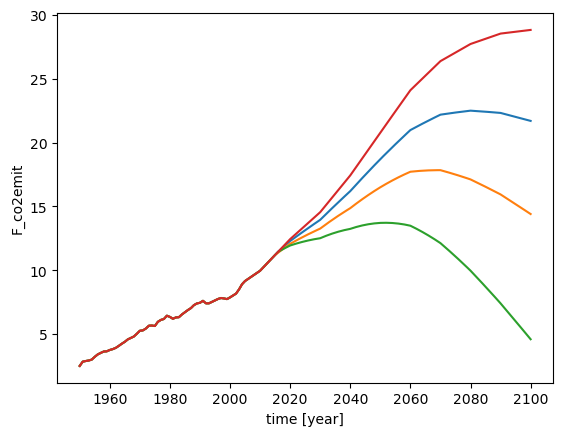

In [26]:
decr_fin_25.F_co2emit.plot()
decr_fin_50.F_co2emit.plot()
decr_fin_85.F_co2emit.plot()
rcp85.F_co2emit.plot()

In [27]:
rcp85.to_netcdf('/Users/chiaraciscato/Desktop/geomar/UVic/chiara_runs/netcdf_forcings/emis_rcp85.nc')
decr_fin_25.to_netcdf('/Users/chiaraciscato/Desktop/geomar/UVic/chiara_runs/netcdf_forcings/emis_decr_25.nc')
decr_fin_50.to_netcdf('/Users/chiaraciscato/Desktop/geomar/UVic/chiara_runs/netcdf_forcings/emis_decr_50.nc')
decr_fin_85.to_netcdf('/Users/chiaraciscato/Desktop/geomar/UVic/chiara_runs/netcdf_forcings/emis_decr_85.nc')